In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
class PolynomialFeature(object):
    """
    polynomial features
    transforms input array with polynomial features

    Example
    =======
    x = [a, b]

    y = PolynomialFeatures(degree=2).transform(x)
    y =
    [[1, a, a^2, a^2],
    [1, b, b^2]]
    """

    def __init__(self, degree=2):
        """
        construct polynomial features

        Parameters
        ----------
        degree : int
            degree of polynomial
        """
        assert isinstance(degree, int)
        self.degree = degree

    def transform(self, x):
        """
        transforms input array with polynomial features

        Parameters
        ----------
        x : (sample_size, n) ndarray
            input array

        Returns
        -------
        output : (sample_size, 1 + degree) ndarray
            polynomial features
        """
        features = [np.ones(len(x))]
        for degree in range(1, self.degree+1): #range does not include the maximum, therefore +1 is needed
            features.append(features[-1]*x)
        return np.asarray(features).transpose()

In [7]:
def create_toy_data(func, sample_size, std, domain=[0, 1]):
    x = np.linspace(domain[0], domain[1], sample_size)
    np.random.shuffle(x)
    t = func(x) + np.random.normal(scale=std, size=x.shape)
    return x, t

def cubic(x):
    return x * (x - 5) * (x + 5)

x_train, y_train = create_toy_data(cubic, 10, 10., [-5, 5])
x = np.linspace(-5, 5, 100)
y = cubic(x)

feature = PolynomialFeature(degree=3)
X_train = feature.transform(x_train)
X = feature.transform(x)

# Variational Lineare Regression

Iterativer Algorithmus zum Schätzen der Erwartungswerte für die Verteilungen für den Gewichtsvektor und Präzision
- Nach zufälliger Initialisierung iteriere
  - Schritt 1: Schätze $\mathbb{E}[\alpha]=\frac{a_n}{b_N}$ mit
    $$a_N= a_0+\frac{M}{2}$$
    $$b_N= b_0 + \frac{1}{2}\mathbb{E}[\underline w^T\underline w]$$
  - Schritt 2: Schätze $\mathbb{E}[\underline w^T\underline w] = \underline m_N^T\underline m_N + \text{Tr}(\underline{\underline{S_N}})$ mit
    $$\underline m_N = \beta \underline{\underline{S_N}}\underline{\underline{\Phi}}^T\underline t$$
    $$\underline{\underline{S_N}} = (\mathbb{E}[\alpha]\underline{\underline{I}}+\beta\underline{\underline{\Phi}}^T\underline{\underline{\Phi}})^{-1}$$

Vorhersage-Verteilung
- Für neue Eingabewerte $x'$ ergibt der Variationsansatz eine Vorhersageverteilung über $t'$
    $$p_{T'}(t'|x',\underline t)= {\cal{}N}(t'|\underline m_N^T\underline\phi(x'),\sigma^2(x'))$$
    - Varianz ist abhängig von Eingabewerten $\underline x'$
    $$\sigma^2(x') = \frac{1}{\beta} + \underline\phi(x')^T\underline{\underline{S_N}}\,\underline\phi(x')$$
    - Im Unterschied zum Bayesschen Ansatz Ende Kapitel 2 mit festem Hyper-Parameter $\alpha$, hängt hier die Varianz über $\underline{\underline{S_N}}$ von $\mathbb{E}[\alpha]$ ab. Mittels Variations-EM wird $\mathbb{E}[\alpha]$ aus den Daten geschätzt.
    

In [8]:
class VariationalLinearRegression(object):
    """
    variational bayesian estimation of linear regression model
    p(w,alpha|X,t)
    ~ q(w)q(alpha)
    = N(w|w_mean, w_var)Gamma(alpha|a,b)

    Attributes
    ----------
    a : float
        a parameter of variational posterior gamma distribution
    b : float
        another parameter of variational posterior gamma distribution
    w_mean : (n_features,) ndarray
        mean of variational posterior gaussian distribution
        called $m_N$ in the formulas above
    w_var : (n_features, n_feautures) ndarray
        variance of variational posterior gaussian distribution
        called $S_N$ in the formulas above
    n_iter : int
        number of iterations performed
    """

    def __init__(self, beta:float=1., a0:float=1., b0:float=1.):
        """
        construct variational linear regressor
        Parameters
        ----------
        beta : float
            precision of observation noise
        a0 : float
            a parameter of prior gamma distribution
            Gamma(alpha|a0,b0)
        b0 : float
            another parameter of prior gamma distribution
            Gamma(alpha|a0,b0)
        """
        self.beta = beta
        self.a0 = a0
        self.b0 = b0

    def fit(self, X:np.ndarray, t:np.ndarray, iter_max:int=100):
        """
        variational bayesian estimation of parameter

        Parameters
        ----------
        X : (N, D) np.ndarray
            training independent variable
        t : (N,) np.ndarray
            training dependent variable
        iter_max : int, optional
            maximum number of iteration (the default is 100)
        """
        D = np.size(X, 1)
        self.a = self.a0 + 0.5 * D
        self.b = self.b0
        I = np.eye(D)
        for _ in range(iter_max):
            param = self.b
            # Ersetzen Sie die folgenden Dummy Berechnungen mit den oben beschriebenen Schätzungen
            # in dem iterativen Algorithmus
            self.w_var = np.eye(D)
            self.w_mean = np.zeros(D)
            self.b = self.b0
            if np.allclose(self.b, param):
                break

    def predict(self, X:np.ndarray, return_std:bool=False):
        """
        make prediction of input

        Parameters
        ----------
        X : (N, D) np.ndarray
            independent variable
        return_std : bool, optional
            return standard deviation of predictive distribution if True
            (the default is False)

        Returns
        -------
        y : (N,) np.ndarray
            mean of predictive distribution
        y_std : (N,) np.ndarray
            standard deviation of predictive distribution
        """
        # Ersetzen Sie die folgenden Dummy Berechnungen mit den oben beschriebenen Schätzungen
        # für die Vorhersage
        y = np.zeros(X.shape[0])
        if return_std:
            y_var = np.zeros(X.shape[0])
            y_std = 10*np.ones(X.shape[0])
            return y, y_std
        return y

########
        
        y= X@ self.w_mean
        if return_std:
            y_var=1 /self.beta +np.sum(X@ self.w_var)....

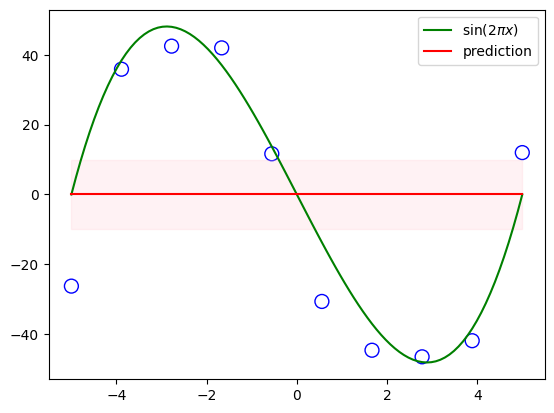

In [13]:
vlr = VariationalLinearRegression(beta=0.01)
vlr.fit(X_train[2:8], y_train[2:8])
y_mean, y_std = vlr.predict(X, return_std=True)
plt.scatter(x_train, y_train, s=100, facecolor="none", edgecolor="b")
plt.plot(x, y, c="g", label="$\\sin(2 \\pi x)$")
plt.plot(x, y_mean, c="r", label="prediction") 
plt.fill_between(x, y_mean - y_std, y_mean + y_std, alpha=0.2, color="pink")
plt.legend()
plt.show()